# Функции активации

In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return x  *  (x  >  0)


def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

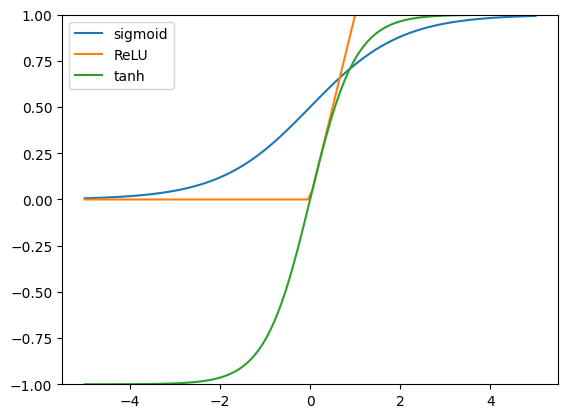

In [28]:
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
ax.plot(x, sigmoid(x), label='sigmoid')
ax.plot(x, ReLU(x), label='ReLU')
ax.plot(x, tanh(x), label='tanh')
ax.set_ylim(-1, 1)
ax.legend()

# Инициализация весов

In [29]:
import numpy as np
import random

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1
print(synaptic_weights)

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [30]:
# можем дополнительно посмотреть процесс формирования весов
np.random.seed(1)

step1 = np.random.random((3, 1))
print(step1, end='\n\n')

step2 = 2 * step1
print(step2, end='\n\n')

step3 = step2 - 1
print(step3)


[[4.17022005e-01]
 [7.20324493e-01]
 [1.14374817e-04]]

[[8.34044009e-01]
 [1.44064899e+00]
 [2.28749635e-04]]

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


# Простая нейронная сеть

Данные 1| 0 0 1 0

Данные 2| 1 1 1 1

Данные 3| 1 0 1 1

Данные 4| 0 1 0 0

In [32]:
'''
Исходный код к уроку 1.
Пример простой нейронной сети на numpy
'''

import numpy as np

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1


# вычисление сигмоид функции
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigm_deriv(x):
    return x * (1 - x)

# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global synaptic_weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, synaptic_weights))
    return output
    
# тренировка нейронной сети
def train_nn(training_inputs, training_outputs, training_iterations):
    global synaptic_weights
    for iteration in range(training_iterations):
        # перекачивание данных через нейрон
        output = run_nn(training_inputs)

        # вычисление ошибки через обратное распространение MSE
        error = training_outputs - output
            
        # выполнение корректировки весов
        adjustments = np.dot(training_inputs.T, error * sigm_deriv(output))

        synaptic_weights += adjustments

# создание данных для обучения
training_inputs = np.array([[0,0,1], [1,1,1], [1,0,1], [0,1,1]])
training_outputs = np.array([[0,1,1,0]]).T

# запуск тренировки нейронной сети 
train_nn(training_inputs, training_outputs, 15000)
print("веса после завершения обучения: ")
print(synaptic_weights)

веса после завершения обучения: 
[[10.08740896]
 [-0.20695366]
 [-4.83757835]]


In [34]:
# получение трех чисел от пользователя
user_inp1 = str(input("Первое число(0 или 1): "))
user_inp2 = str(input("Второе число(0 или 1): "))
user_inp3 = str(input("Третье число(0 или 1): "))

print("Проверка на новых данных: {user_inp1} {user_inp2} {user_inp3}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([user_inp1, user_inp2, user_inp3])))

Первое число(0 или 1): 0
Второе число(0 или 1): 1
Третье число(0 или 1): 0
Проверка на новых данных: {user_inp1} {user_inp2} {user_inp3}
Предсказание нейронной сети: 
[0.44844546]


# Данные

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('Iris.csv')

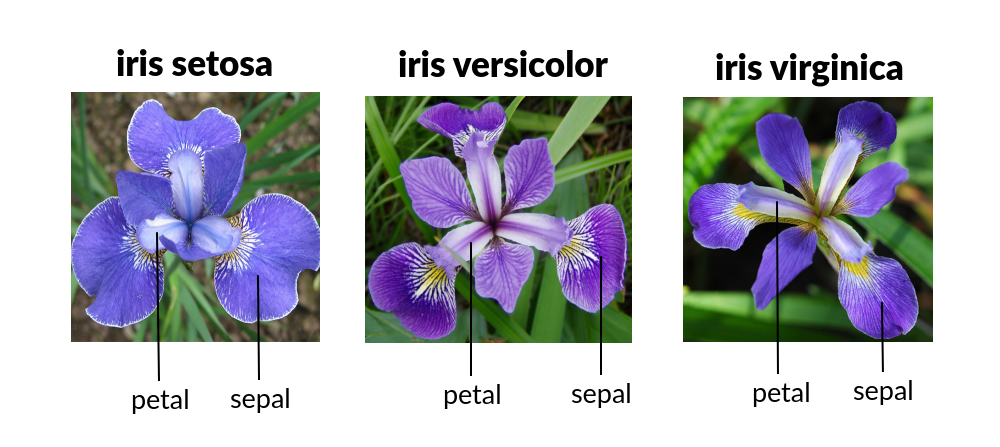

чашелистик и лепесток

In [37]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [38]:
data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()

In [39]:
data.shape

(150, 4)

In [40]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Двуслойная нейронная сеть

In [41]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [46]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

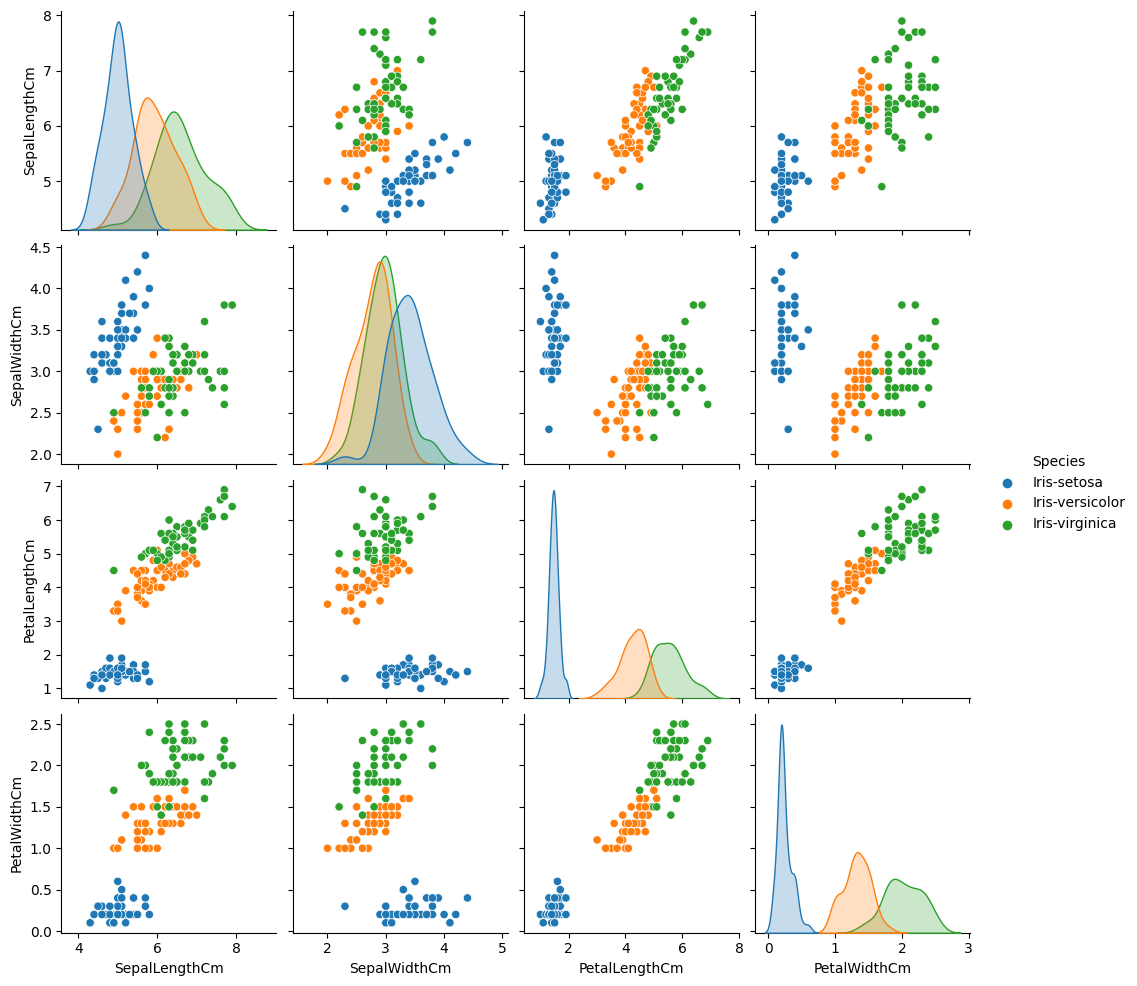

In [47]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
   

In [44]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0

In [50]:
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.01

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

Точность нейронной сети 93.75%


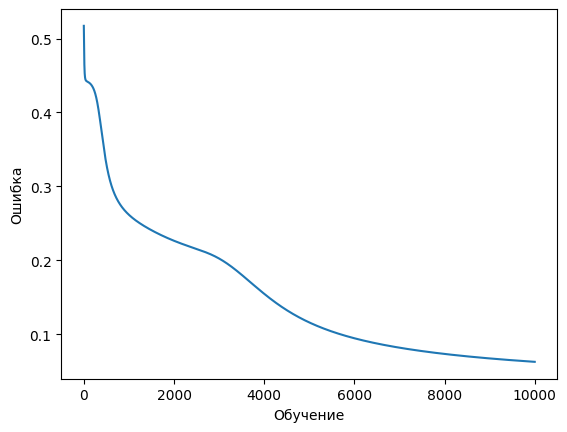

In [51]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [52]:
errors[-1]

0.06245642226642478

In [53]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

In [54]:
layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))

In [55]:
print(classification_report(y_test.argmax(-1), pred.argmax(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [56]:
print(multilabel_confusion_matrix(y_test.argmax(-1), pred.argmax(-1)))

[[[31  0]
  [ 0 19]]

 [[34  0]
  [ 1 15]]

 [[34  1]
  [ 0 15]]]
